### TASK 1: Add a Launch Site Drop-down Input Component

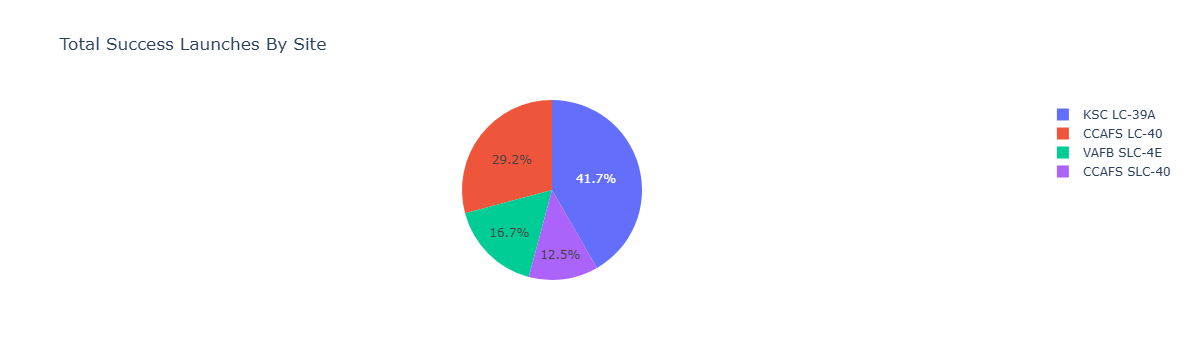

done


In [22]:
import piplite
await piplite.install(['pandas', 'plotly', 'nbformat'])

import pandas as pd
import plotly.express as px
from js import fetch
import io

# Loading data
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"
resp = await fetch(URL)
spacex_df = pd.read_csv(io.BytesIO((await resp.arrayBuffer()).to_py()))


success_counts = spacex_df.groupby('Launch Site')['class'].sum().reset_index()
fig1 = px.pie(success_counts, values='class', names='Launch Site',
              title='Total Success Launches By Site')
fig1.show()  # This should work now!
print("done")

### TASK 2: Add a callback function to render success-pie-chart based on selected site dropdown

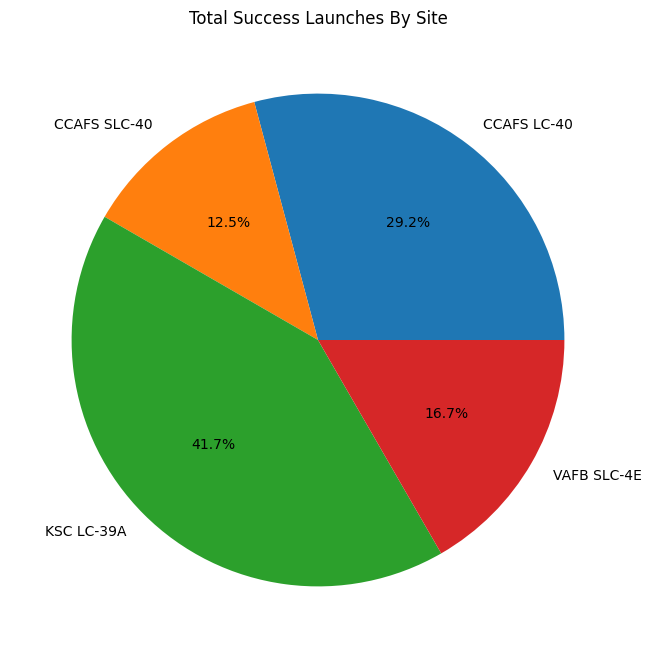

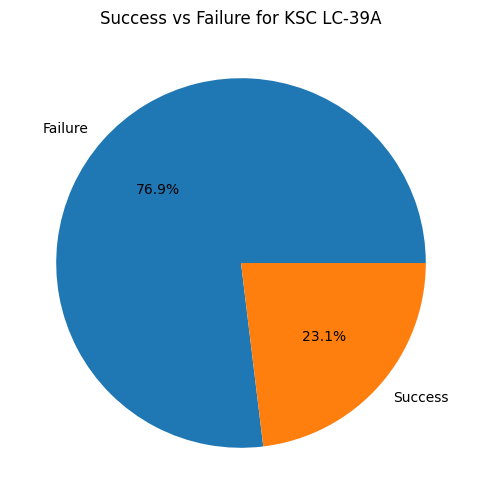

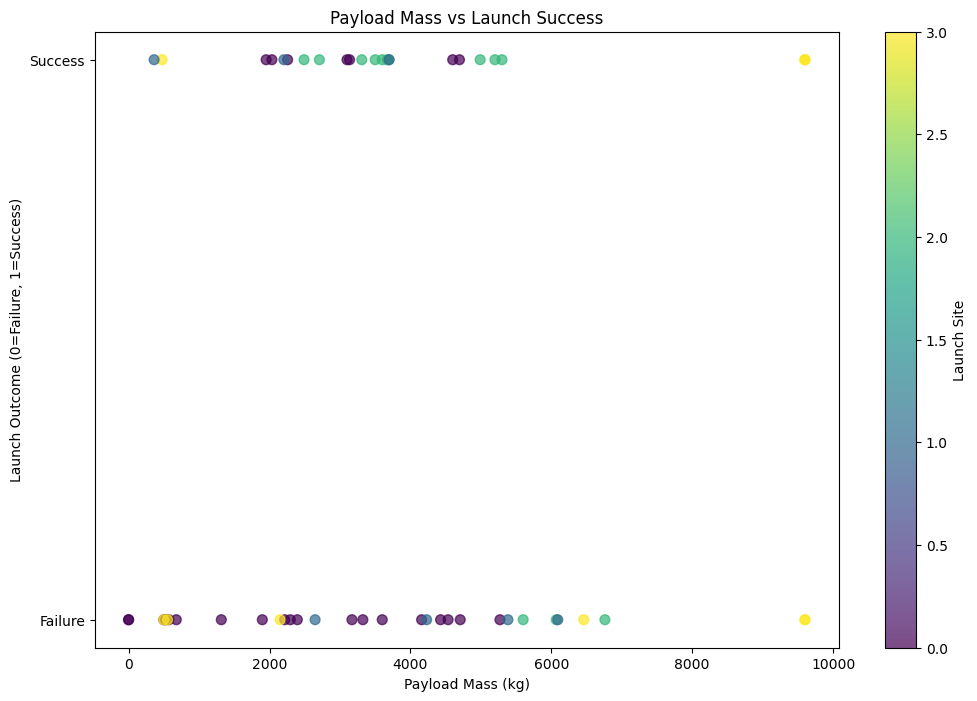

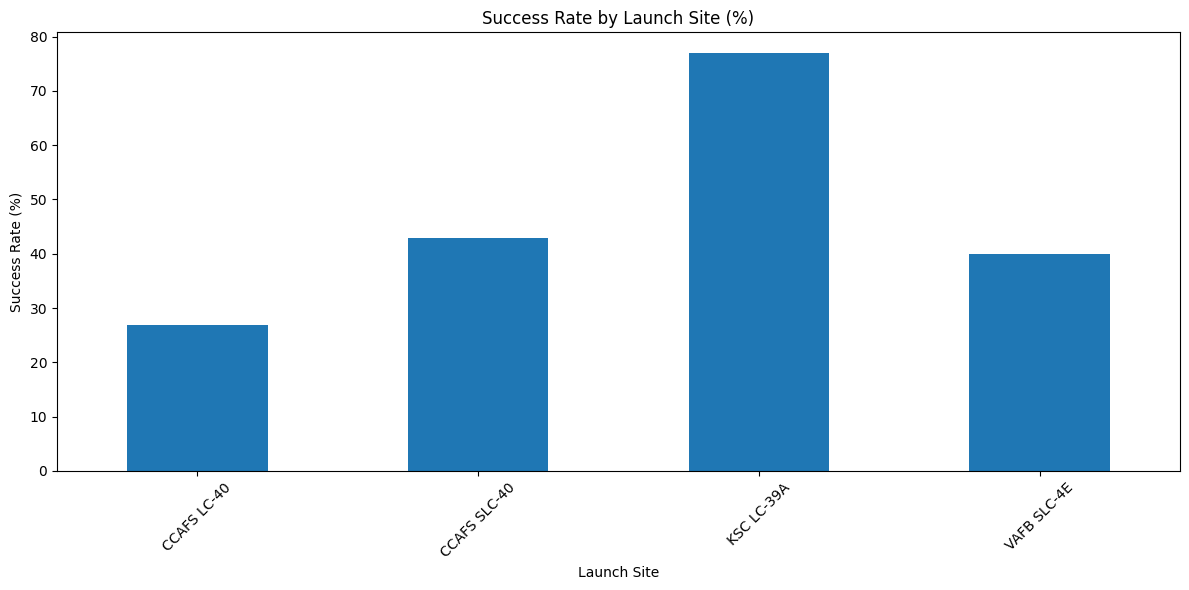

All visualizations created successfully!


In [21]:
# 1. Pie chart - Success by Launch Site
success_counts = spacex_df.groupby('Launch Site')['class'].sum()
plt.figure(figsize=(10, 8))
plt.pie(success_counts.values, labels=success_counts.index, autopct='%1.1f%%')
plt.title('Total Success Launches By Site')
plt.show()

# 2. Success vs Failure for KSC LC-39A
ksc_data = spacex_df[spacex_df['Launch Site'] == 'KSC LC-39A']
ksc_outcomes = ksc_data['class'].value_counts()
outcome_labels = ['Failure', 'Success']
plt.figure(figsize=(8, 6))
plt.pie(ksc_outcomes.values, labels=outcome_labels, autopct='%1.1f%%')
plt.title('Success vs Failure for KSC LC-39A')
plt.show()

# 3. Scatter plot - Payload vs Success
plt.figure(figsize=(12, 8))
scatter = plt.scatter(spacex_df['Payload Mass (kg)'], spacex_df['class'], 
                     c=spacex_df['Launch Site'].astype('category').cat.codes,
                     alpha=0.7, s=50)
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Outcome (0=Failure, 1=Success)')
plt.title('Payload Mass vs Launch Success')
plt.yticks([0, 1], ['Failure', 'Success'])
plt.colorbar(scatter, label='Launch Site')
plt.show()

# 4. Success rate by Launch Site
success_rates = spacex_df.groupby('Launch Site')['class'].mean() * 100
plt.figure(figsize=(12, 6))
success_rates.plot(kind='bar')
plt.title('Success Rate by Launch Site (%)')
plt.ylabel('Success Rate (%)')
plt.xlabel('Launch Site')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("All visualizations created successfully!")


### TASK 3: Add a Range Slider to Select Payload


TASK 3 - PAYLOAD RANGE ANALYSIS:
----------------------------------------


<ipython-input-23-e0a5b071b545>:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Payload Range Analysis:
(-9.6, 1920.0]: 12.0 launches | 2.0 successful | 16.7%
  ███░░░░░░░░░░░░░░░░░ 16.7%
(1920.0, 3840.0]: 22.0 launches | 14.0 successful | 63.6%
  ████████████░░░░░░░░ 63.6%
(3840.0, 5760.0]: 13.0 launches | 5.0 successful | 38.5%
  ███████░░░░░░░░░░░░░ 38.5%
(5760.0, 7680.0]: 4.0 launches | 0.0 successful | 0.0%
  ░░░░░░░░░░░░░░░░░░░░ 0.0%
(7680.0, 9600.0]: 5.0 launches | 3.0 successful | 60.0%
  ████████████░░░░░░░░ 60.0%


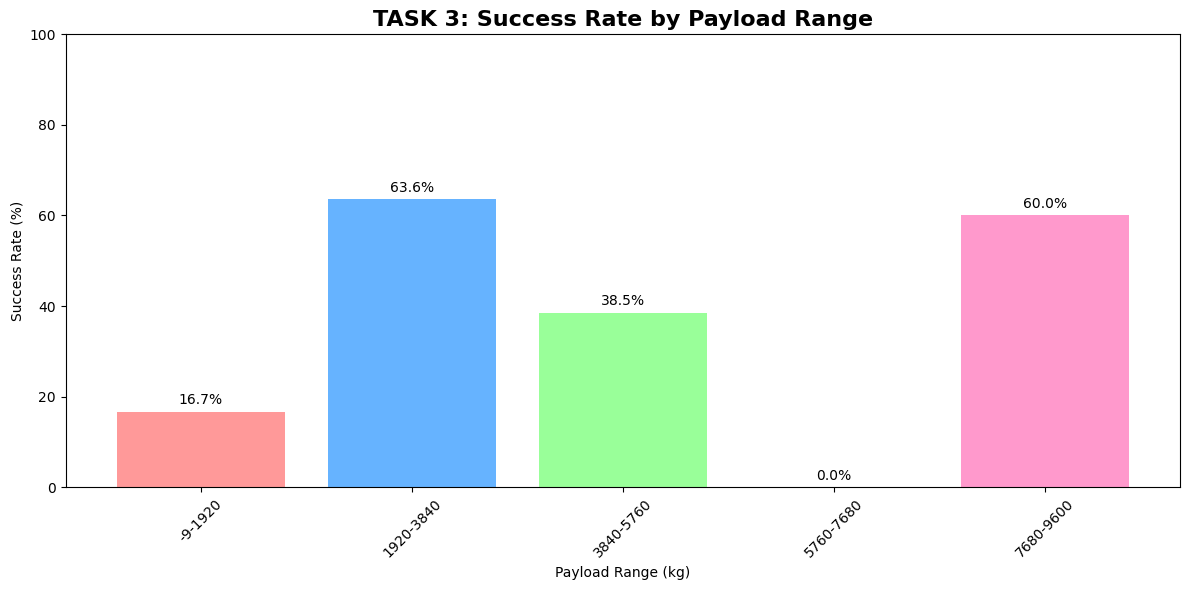

In [23]:
print("\nTASK 3 - PAYLOAD RANGE ANALYSIS:")
print("-" * 40)

# Creating payload bins (equivalent to range slider functionality)
payload_bins = pd.cut(spacex_df['Payload Mass (kg)'], bins=5)
payload_success = spacex_df.groupby(payload_bins)['class'].agg(['count', 'sum', 'mean'])
payload_success['success_rate_%'] = (payload_success['mean'] * 100).round(1)

# Text analysis with ASCII visualization
print("Payload Range Analysis:")
for range_val, row in payload_success.iterrows():
    print(f"{range_val}: {row['count']} launches | {row['sum']} successful | {row['success_rate_%']}%")
    bar_length = int(row['success_rate_%'] / 5)
    bar = "█" * bar_length + "░" * (20 - bar_length)
    print(f"  {bar} {row['success_rate_%']}%")

# Bar chart: Success rate by payload ranges
bin_labels = [f"{int(interval.left)}-{int(interval.right)}" for interval in payload_success.index]
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(payload_success)), payload_success['success_rate_%'],
               color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc'])
plt.xlabel('Payload Range (kg)')
plt.ylabel('Success Rate (%)')
plt.title('TASK 3: Success Rate by Payload Range', fontsize=16, fontweight='bold')
plt.xticks(range(len(payload_success)), bin_labels, rotation=45)
plt.ylim(0, 100)

# Addedd percentage labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### TASK 4: Add a callback function to render the success-payload-scatter-chart scatter plot


TASK 4 - PAYLOAD vs SUCCESS SCATTER PLOT:
----------------------------------------


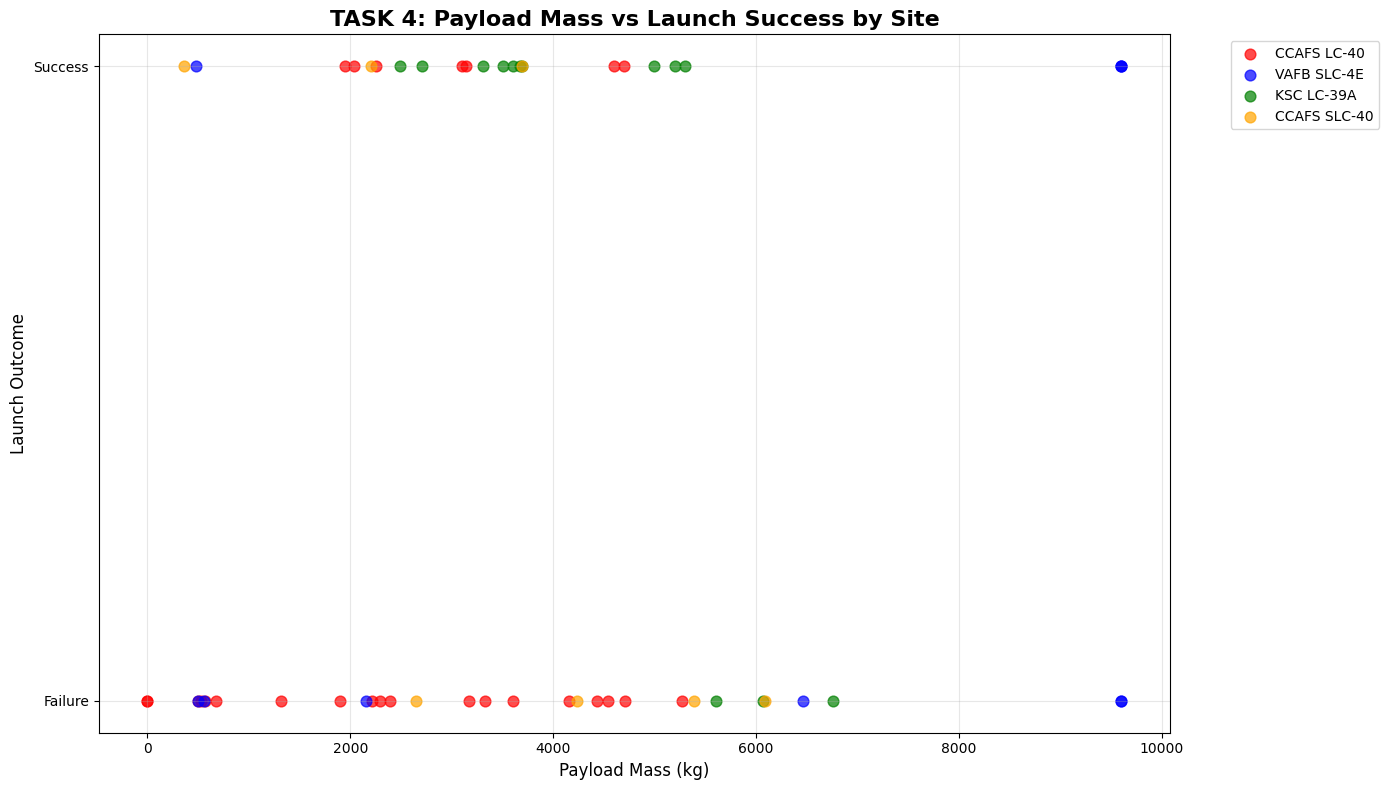


Payload vs Success Correlation Analysis:
• Correlation coefficient: 0.100


<ipython-input-24-4f43c2eaeb3a>:34: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.




Success rates by payload quartiles:
• Q1 (Low): 28.6% success rate
• Q2: 50.0% success rate
• Q3: 57.1% success rate
• Q4 (High): 35.7% success rate
Done


In [24]:

print("\nTASK 4 - PAYLOAD vs SUCCESS SCATTER PLOT:")
print("-" * 40)

# Scatter plot: Payload vs Success 
plt.figure(figsize=(14, 8))

# Different colors for different launch sites 
sites = spacex_df['Launch Site'].unique()
colors = ['red', 'blue', 'green', 'orange']
site_colors = dict(zip(sites, colors))

# Plot each site with different colors 
for site in sites:
    site_data = spacex_df[spacex_df['Launch Site'] == site]
    plt.scatter(site_data['Payload Mass (kg)'], site_data['class'], 
               label=site, alpha=0.7, s=60, c=site_colors[site])

plt.xlabel('Payload Mass (kg)', fontsize=12)
plt.ylabel('Launch Outcome', fontsize=12)
plt.title('TASK 4: Payload Mass vs Launch Success by Site', fontsize=16, fontweight='bold')
plt.yticks([0, 1], ['Failure', 'Success'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Additional analysis: Correlation statistics
print("\nPayload vs Success Correlation Analysis:")
correlation = spacex_df['Payload Mass (kg)'].corr(spacex_df['class'])
print(f"• Correlation coefficient: {correlation:.3f}")

# Success rates by payload quartiles
payload_quartiles = pd.qcut(spacex_df['Payload Mass (kg)'], q=4, labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)'])
quartile_success = spacex_df.groupby(payload_quartiles)['class'].mean() * 100

print("\nSuccess rates by payload quartiles:")
for quartile, rate in quartile_success.items():
    print(f"• {quartile}: {rate:.1f}% success rate")

print("Done")


## Dashboard

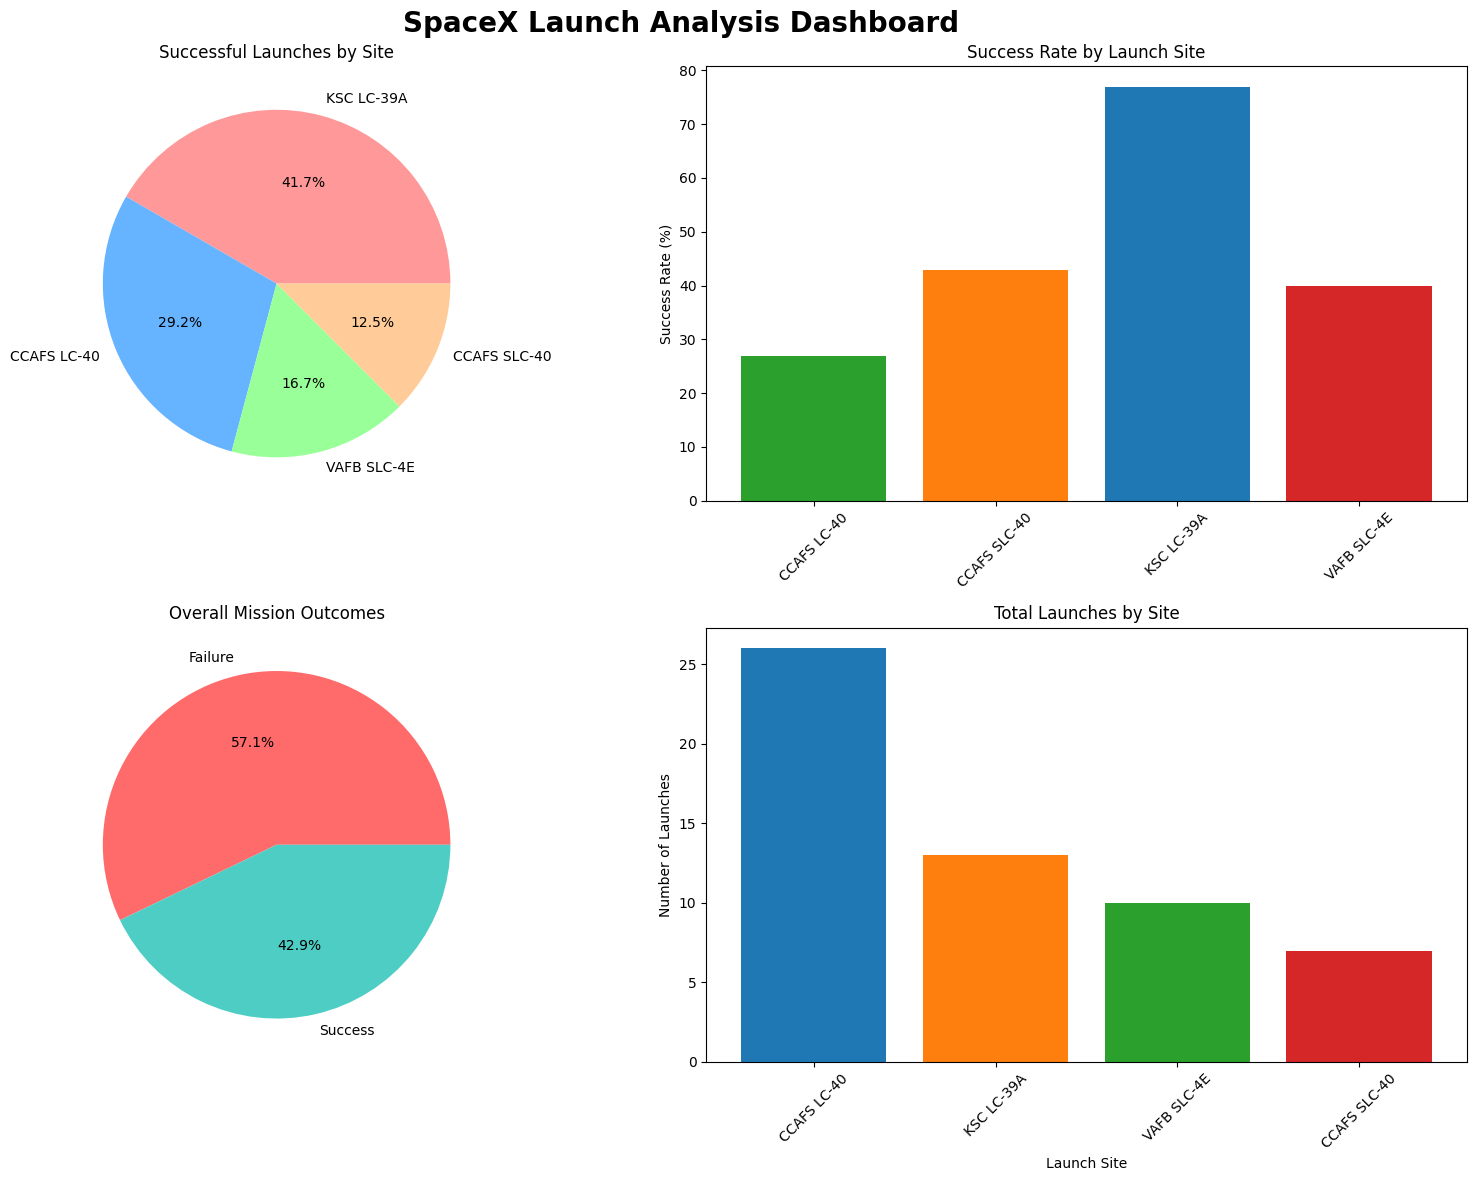

Dashboard created successfully!


In [30]:
# COMPLETE DASHBOARD CODE - Run this entire block together

# Make sure you have the data loaded first
import pandas as pd
import matplotlib.pyplot as plt
from js import fetch
import io

# Load data (if not already loaded)
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"
resp = await fetch(URL)
spacex_df = pd.read_csv(io.BytesIO((await resp.arrayBuffer()).to_py()))

# Calculate the required variables
success_counts = spacex_df.groupby('Launch Site')['class'].sum().sort_values(ascending=False)
success_rates = (spacex_df.groupby('Launch Site')['class'].mean() * 100).round(1)

# Dashboard Summary (CORRECTED)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('SpaceX Launch Analysis Dashboard', fontsize=20, fontweight='bold')

# Pie chart: Success by site
ax1.pie(success_counts.values, labels=success_counts.index, autopct='%1.1f%%',
        colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
ax1.set_title('Successful Launches by Site')

# Bar chart: Success rates
ax2.bar(range(len(success_rates)), success_rates.values,
        color=['#2ca02c', '#ff7f0e', '#1f77b4', '#d62728'])
ax2.set_title('Success Rate by Launch Site')
ax2.set_ylabel('Success Rate (%)')
ax2.set_xticks(range(len(success_rates)))
ax2.set_xticklabels(success_rates.index, rotation=45)

# Pie chart: Overall outcomes
total_success = spacex_df['class'].sum()
total_failure = len(spacex_df) - total_success
ax3.pie([total_failure, total_success], labels=['Failure', 'Success'], 
        autopct='%1.1f%%', colors=['#ff6b6b', '#4ecdc4'])
ax3.set_title('Overall Mission Outcomes')

# Bar chart: Total launches by site
site_counts = spacex_df['Launch Site'].value_counts()
ax4.bar(range(len(site_counts)), site_counts.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax4.set_title('Total Launches by Site')
ax4.set_xlabel('Launch Site')
ax4.set_ylabel('Number of Launches')
ax4.set_xticks(range(len(site_counts)))
ax4.set_xticklabels(site_counts.index, rotation=45)

plt.tight_layout()
plt.show()

print("Dashboard created successfully")
